In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [16]:
airline = pd.read_csv('AirPassengers.csv', index_col ='Month', parse_dates = True)
airline.rename(columns={'#Passengers':'Passengers'},inplace=True)
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


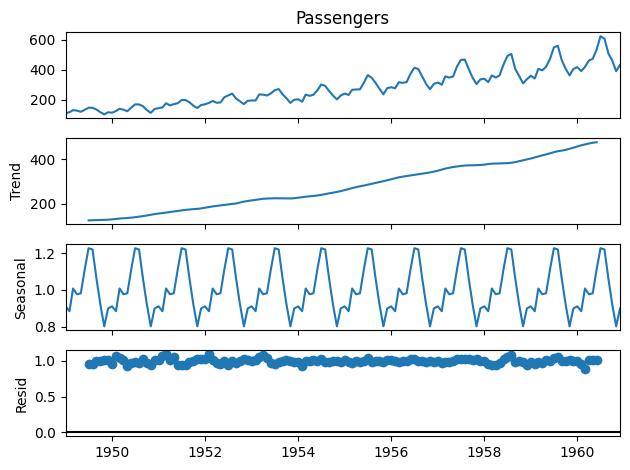

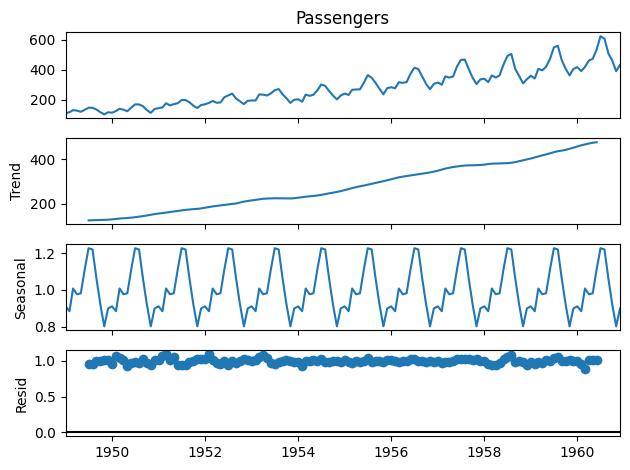

In [17]:
result = seasonal_decompose(airline['Passengers'],  model ='multiplicative')
result.plot()

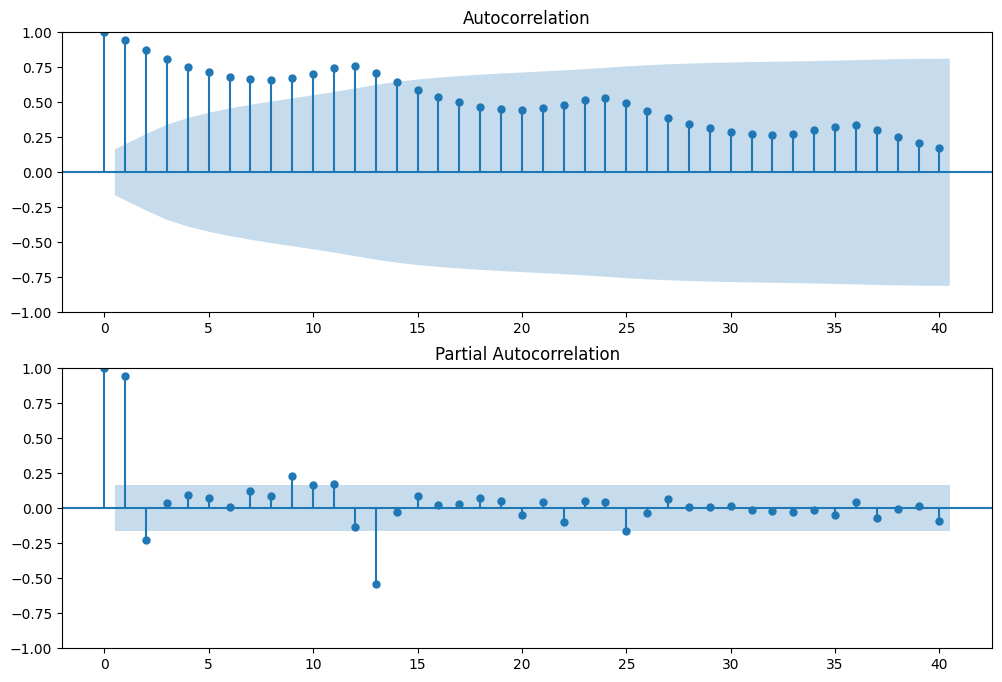

In [18]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(airline['Passengers'], ax=ax[0], lags=40)
plot_pacf(airline['Passengers'], ax=ax[1], lags=40)
plt.show()

In [19]:
!pip install pmdarima

In [14]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.27 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.57 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.75 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.40 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 01 May 2024   AIC                           1019.178
Time:                                     07:20:01   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:]

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Wed, 01 May 2024   AIC                            896.027
Time:                                    07:20:14   BIC                            909.922
Sample:                                01-01-1949   HQIC                           901.669
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2982      0.076     -3.934      0.000      -0.447      -0.150
ar.S.L12       0.7105      0.237      2.998      0.003       0.246       1.175
ar.S.L24       0.2886      0.100      2.885      0.004       0.093       0.485
ma.S.L12      -0.9800      2.262     -0.433      0.665      -5.413       3.453
sigma2        88.2971    179.432      0.492      0.623    -263.384     439.978
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

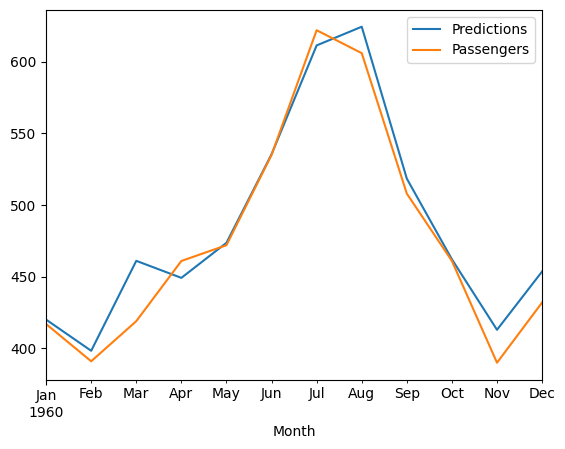

In [21]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

predictions.plot(legend = True)
test['Passengers'].plot(legend = True)


In [22]:
from statsmodels.tools.eval_measures import rmse
print("RMSE: ",rmse(test["Passengers"], predictions))

RMSE:  17.167115199421534


In [23]:
model = model = SARIMAX(airline['Passengers'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

<Axes: xlabel='Month'>

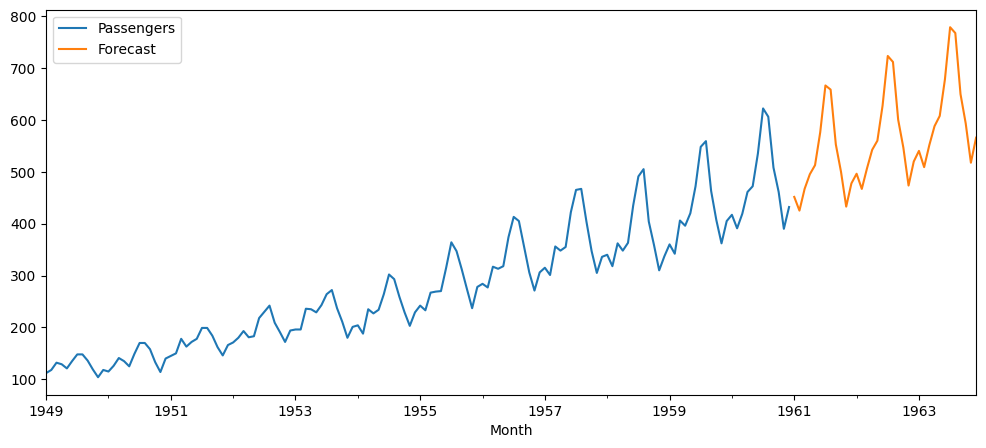

In [24]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 3 * 12,
						typ = 'levels').rename('Forecast')

airline['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)